<h1 align="center">RESULTS: Comparision of Baseline and Lower Tax on Employees </h1> 



This file generates  aggregate and  cross-sectional moments using the simulated data. The simlations are generated using the simulate.py fle. Please update the paths to the simulation data before running.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import stats
import os.path
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', -1)
from SCEconomy import *
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig",dpi=200)
from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = (10.,10.)

In [2]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df_baseline=[]
df_target=[]
def gini(series, weights):
    if series.size!=weights.size:
        print("Weights are not the same size as the series")
        return
    sorted_series = series.sort_values()
    height, area = 0, 0
    for i in range(series.size):
        value = series[sorted_series.index[i]]
        wgt = weights[sorted_series.index[i]]
        height += wgt*value
        area += wgt*(height - value / 2)
    fair_area = height * weights.sum() / 2.
    return (fair_area - area) / fair_area


def gini_alt(series):
    csum= 0.0
    N=len(series)
    for i in range(N):
        for j in range(N):
            value_i = series.iloc[i]
            value_j = series.iloc[j]
            csum+=np.abs(value_i-value_j)
        
    gini_val=0.5*(csum/(N)**2)/series.mean()
    
    return gini_val


def Lorenz(series,quantiles):
    N=len(quantiles)
    Lz=np.zeros(N)
    for n in range(N):
        selection = series<series.quantile(quantiles[n])
        Lz[n]=series[selection].sum()/series.sum()
               
        
    return  Lz


def uploadData(case,w,rs,rc,p,delta):
    data=pd.DataFrame()
    is_iz=pd.read_csv(case+'/is_to_iz.csv',delim_whitespace=True,header=None)
    zgrid=pd.read_csv(case+'/zgrid.csv',delim_whitespace=True,header=None)
    is_to_ieps=pd.read_csv(case+'/is_to_ieps.csv', delim_whitespace=True,header=None)
    epsgrid=pd.read_csv(case+'/epsgrid.csv', delim_whitespace=True,header=None)
    T=100-1
    
    data['s_ind_']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None).iloc[:,T-1]
    data['s_ind']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None, usecols=[T])
    
    
    data['eps']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]   
    data['eps_']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]   
    data['iz']=is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]
    data['iz_']=is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['ieps']=is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]  
    data['ieps_']=is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['z']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]    
    data['z_']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]    
    data['ys']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ys_']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ks']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ns']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T])
    data['x']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['n']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ks_']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ns_']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['x_']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['n_']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagC']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T])
    data['flagC_']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagO']=pd.read_csv(case+'/data_is_o.csv',delim_whitespace=True,header=None, usecols=[T])
    data['kappa']=pd.read_csv(case+'/data_kap.csv', delim_whitespace=True,header=None, usecols=[T])
    data['hkap']=pd.read_csv(case+'/data_hkap.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['hy']=pd.read_csv(case+'/data_hy.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['s_age']=pd.read_csv(case+'/s_age.csv',  delim_whitespace=True,header=None)
    data['sind_age']=pd.read_csv(case+'/sind_age.csv',  delim_whitespace=True,header=None)
    data['ind_age']=pd.read_csv(case+'/ind_age.csv',  delim_whitespace=True,header=None)
    data['c_age']=pd.read_csv(case+'/c_age.csv',  delim_whitespace=True,header=None)
    data['div_']=pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['div']= pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_sdf_']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['val_mf_']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T-1])

    data['val_sdf']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_mf']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['a']= pd.read_csv(case+'/data_a.csv',  delim_whitespace=True,header=None, usecols=[T])
    
    data['flagC']=data['flagC'].astype('bool')
    data['flagC_']=data['flagC_'].astype('bool')
    data['flagO']=data['flagO'].astype('bool')
    data['expenses']=(rs+delta)*data['ks']+w*data['ns']+data['x']
    data['expenses_']=(rs+delta)*data['ks_']+w*data['ns_']+data['x_']
    data['wns']=data['ns']*w
    data['pys']=p*data['ys']

    data['bus_inc']=p*data['ys']-data['expenses']
    data['bus_inc_']=p*data['ys_']-data['expenses_']
    data['lab_inc']=data.eps*w*data.n
    data['lab_inc_']=data.eps_*w*data.n_
    data['n_e']=data['hkap']+data['hy']
    data['ne']=data['n_e']
    data['kappa_adj']=(data.kappa**0.15)*data.z
    data['ret_sdf']=(data['val_sdf']+data['div_'])/data['val_sdf_']+0.02
    data['ret_mf']=(data['val_mf']+data['div_'])/data['val_mf_']+0.02
    data['div_yld_sdf']=(data['div'])/data['val_sdf']
    data['div_yld_mf']=(data['div'])/data['val_mf']
    #data['intan_int_sdf']=data['val_sdf'] /(data['val_sdf']+data['ks'])
    #data['intan_int_mf']=data['val_mf'] /(data['val_mf']+data['ks'])
    data['profit_rate']=100*data['bus_inc']/data['ks']
    data['measured_markups']=100*(data['bus_inc'])/(data['x']+(rs+delta)*data['ks']+w*data['ns'])
    data['measured_markups_alt']=100*(data['bus_inc']+data['x'])/((rs+delta)*data['ks']+w*data['ns'])
    data['x_pys']=data['x']/(p*data['ys'])
    data['cogs']=((rs+delta)*data['ks']+w*data['ns']+data['x'])    
    data['wealth_sdf']=data['a']+data['val_sdf']   
    data['wealth_mf']=data['a']+data['val_mf']   
    data['ztilde'] = np.log(data['z'])
    data['zkapphi']=data['z']*data['kappa']**(0.15)
    data['ztilde_meas'] = np.log(data['ys']/(data['ks']**(0.333)*data['ns']**(0.666)))
    data['inc']=0.0
    data['inc'][data['flagC']==True]=data[data['flagC']==True]['lab_inc']
    data['inc'][data['flagC']==False]=data[data['flagC']==False]['bus_inc']
    data['tot_inc']=data['inc']+rc*data['a'] 
    if os.path.exists(case+'/data_R.csv'):
        data['R']= pd.read_csv(case+'/data_R.csv',  delim_whitespace=True,header=None, usecols=[T])
        data['intan_int']=data['R']/(data['R']+data['ks'])
        data['wealth_R']=0.0
        data['wealth_R'][data['flagC']==True]=data[data['flagC']==True]['a']   
        data['wealth_R'][data['flagC']==False]=data[data['flagC']==False]['a']+data[data['flagC']==False]['R']   
        data['wealth_income_ratio']=data['wealth_R']/data['tot_inc']
  
  

    data['wgt']=1.0
    return data




def get_prices(path_baseline,momfilename):
    with open (path_baseline+ momfilename, 'rt') as myfile:  # Open file lorem.txt for reading text
        for myline in myfile:                 # For each line, read it to a string 
          #print("gdp line")
          #print(myline.find("GDP("))
          if myline.find("w")==0:
            #print(myline)
            w=float(myline[ myline.find("=")+1:])
          if myline.find("S-good price")==0:
            #print(myline)
            p=float(myline[ myline.find("=")+1:])
          if myline.find("rc")==0:
            #print(myline)
            rc=float(myline[ myline.find("=")+1:])
          if myline.find("rs")==0:
            #print(myline)
            rs=float(myline[ myline.find("=")+1:])
          if myline.find("GDP(")==2:
            #print(myline)
            GVA=float(myline[ myline.find("=")+1:])
          if myline.find("investment,")==2:
            #print(myline)
            x=float(myline[ myline.find("=")+1:])
            #print("GDP = "+ str(GVA-x))
          if myline.find("delk ")==0:
            #print(myline)
            delta=float(myline[ myline.find("=")+1:])
            #print("delta= "+ str(delta))
            
    return w,p,rc,rs,delta,GVA-x



def decomposition (var_bin,bins,varlist):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
    mean_baseline=data.groupby('bin_' + var_bin).mean()[varlist]
    count_baseline=data.groupby('bin_' + var_bin).count()[varlist]
    
    
    print("-------------- baseline means ----------")
    print(mean_baseline)
    print("-------------- baseline counts ----------")
    print(count_baseline)
    print('')
    return mean_baseline,count_baseline

def format_table(data,total):
    results=[]
    results=pd.DataFrame(data) 
    results['bins/total']=(sorted(pd.cut(df_baseline[var_bin], bins).unique()) )
    cols = results.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    results=results[cols]  #    OR    df = df.ix[:, cols]
    results=results.append(total,ignore_index=True)
    results.iloc[-1,0]='total'
    
    return results


def print_results (var_bin,bins,varlist,df_baseline=df_baseline,df_target=df_target):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    df_baseline['bin_' + var_bin] = pd.cut(df_baseline[var_bin], bins, labels = False) 
    df_target['bin_' + var_bin] = pd.cut(df_target[var_bin], bins, labels = False) 
    
    mean_baseline=df_baseline.groupby('bin_' + var_bin).mean()[varlist]
    mean_target=df_target.groupby('bin_' + var_bin).mean()[varlist]
    sum_baseline=df_baseline.groupby('bin_' + var_bin).sum()[varlist]
    sum_target=df_target.groupby('bin_' + var_bin).sum()[varlist]
    count_baseline=df_baseline.groupby('bin_' + var_bin).count()[varlist]
    count_target=df_target.groupby('bin_' + var_bin).count()[varlist]
    
    intensive=(mean_target-mean_baseline)*(count_target+count_baseline)/2
    extensive=(count_target-count_baseline)*(mean_target+mean_baseline)/2
    total=intensive+extensive
    intensive=100.*(intensive/(total.sum()))
    extensive=100.*(extensive/(total.sum()))
    total_per_change=(100*total.sum()/sum_baseline.sum()).T
    intensive_alt=intensive*total_per_change*(1.0/100)
    extensive_alt=extensive*total_per_change*(1.0/100)
   
    return total,sum_baseline,intensive_alt,extensive_alt

   

    print('')
    
def __extract_num__(item_name, text):
    
    import re
    for ln in text.splitlines():
        if ln.startswith(item_name):

            match = re.search(r'[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?', ln[len(item_name):])

            if match is not None:
                return float(match.group(0))
            else:
                return np.nan
                    
                
    return np.nan

def get_data_textbuffer(item_name, outputs):
    
    return np.array([__extract_num__(item_name, text) for text in outputs])
    
   

## Set paths

In [4]:
casename='newbench'
targetname='newbench_taunonly'
#path_baseline = '/home/shared/yaoxx366/save_data/save_data_'+casename+'/'
path_baseline='./save_data_'+casename
path_table = './save_data_'+casename+'/'
path_target = './save_data_'+ targetname + '/'
momfilename_baseline= 'paras_mom_' + casename  + '.txt'
momfilename_target= 'paras_mom_' + targetname  + '.txt'
pathtosiminitbase='./save_data_'+ casename+  '/econ_' +casename + '.pickle'
pathtosiminittarget='./save_data_'+ targetname+  '/econ_' +targetname + '.pickle'
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()

# Calibration

## Preferences

In [5]:
print(pd.read_csv(path_table + 'preferences.csv').to_string(header=None))

Discount factor                           0.980
Paternalistic discount factor             1.000
Consumption weight                        0.420
Leisure weight                            0.580
Intertemporal elasticity inverse          1.500
C-corporate good share in consumption     0.449
Love of business parameter                0.000
Labor productivity decline for the old    0.500
Business productivity decline for the old 0.500


## Life cycle related params

In [6]:
print(pd.read_csv(path_table + 'age_transition_table.csv', skiprows = 1).to_string(index=None))

Unnamed: 0     y     o
 y         0.978 0.022
 o         0.067 0.933


## Technology

In [7]:
print(pd.read_csv(path_table + 'technologies.csv').to_string(header=None))

Technology growth                                                      0.020
C-corporate fixed asset share                                          0.502
Private business fixed asset share                                     0.300
Private business sweat capital share                                   0.150
Private business ces labor composite share                             0.550
Private business employee hours share parameter in ces labor composite 0.575
Private business hours substitution parameter in ces labor composite   0.500
Fixed asset depreciation                                               0.041
Sweat capital depreciation                                             0.058
Sweat capital owner hour share                                         0.408
Sweat capital c-good share                                             0.592
Sweat capital deterioration for workers                                0.400
Sweat capital deterioration for bequests                               0.100

## Shocks

### Business skill

In [8]:
# np.loadtxt(path_table + 'business_productivity_transition_table.csv', skiprows = 2, skipcolumn = 1)
# pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1)


print(pd.Series(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('zgrid').T)
print()
print(pd.DataFrame(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


       0  1  2  3  4
zgrid  0  1  2  3  4

      0     1     2     3     4
0 0.612 0.170 0.098 0.065 0.055
1 0.172 0.551 0.187 0.064 0.025
2 0.099 0.191 0.475 0.190 0.045
3 0.060 0.055 0.164 0.558 0.164
4 0.046 0.009 0.034 0.135 0.776


### Labor skills

In [9]:
print(pd.Series(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('epsgrid').T)
print('')
print(pd.DataFrame(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


         0  1  2  3  4
epsgrid  0  1  2  3  4

      0     1     2     3     4
0 0.424 0.549 0.027 0.000 0.000
1 0.046 0.621 0.327 0.005 0.000
2 0.001 0.145 0.709 0.145 0.001
3 0.000 0.005 0.327 0.621 0.046
4 0.000 0.000 0.027 0.549 0.424


## Tax policy

### Pass thru income tax

In [10]:
print(pd.read_csv(path_table + 'business_income_tax.csv').to_string(index=None))

 bbracket_left  bbracket_right   taub   psib
-inf             0.153         0.140  0.023 
0.153            0.304         0.183  0.043 
0.304            0.912         0.201  0.060 
0.912            2.667         0.235  0.156 
2.667            5.727         0.262  0.379 
5.727            9.104         0.269  0.504 
9.104            inf           0.280  0.814 


### Labor income tax

In [11]:
print(pd.read_csv(path_table + 'labor_income_tax.csv').to_string(index=None))

 nbracket_left  nbracket_right   taun   psin
-inf             0.173         0.293  -0.054
0.173            0.262         0.324  -0.037
0.262            0.404         0.343  -0.022
0.404            0.732         0.390  0.037 
0.732            1.409         0.400  0.060 
1.409            3.3138        0.408  0.095 
3.314            inf           0.419  0.208 


### Other taxes

In [12]:
print(pd.read_csv(path_table + 'policies.csv').to_string(header=None))

Consumption tax                        0.065
Dividends tax                          0.133
Profits tax                            0.360
Government expenditure relative to GDP 0.133
Retirement Transfer                    0.800


# Aggregates

In [13]:
mom=pd.read_csv(path_table + 'moments.csv')
mom.columns=['desc','val']    
tax=pd.read_csv(path_table + 'policies.csv')
tax.columns=['val']
cal=pd.read_csv(path_table + 'technologies.csv')
cal.columns=['val']
w=float(mom[mom.desc.str.strip()=='Wage (w)']['val'].values)
p=float(mom[mom.desc.str.strip()=='S-good price (p)']['val'].values)
rc=float(mom[mom.desc.str.strip()=='Interest rate (rc)']['val'].values)
GDP=float(mom[mom.desc.str.strip()=='GDP(yc + yn + p*Eys - Ex)']['val'].values)
taup=float(tax[tax.index.str.strip()=='Profits tax']['val'].values)
rs=rc*(1-taup)
delta=float(cal[cal.index.str.strip()=='Fixed asset depreciation']['val'].values)

In [14]:
data=uploadData(path_baseline,w,rs,rc,p,delta)

## GDP
We normalize several things in the paper by GDP

In [15]:
print(GDP)

3.0923335720580734


## Aggregate markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [16]:
print(100*data.bus_inc.sum()/data.cogs.sum())

40.54400109223414


## Aggregate profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [17]:
print(100*data.bus_inc.sum()/data.ks.sum())

8.169521166039837


## National Accounts

### income share

In [18]:
print(pd.read_csv(path_table + 'income_shares.csv').to_string(header=None,index=None))

 Business Income                              0.733
 Sweat labor income                           0.090
 Non-sweat labor income                       0.327
 Non-sweat labor income C corporations        0.222
 Non-sweat labor income pass through business 0.105
 Non-sweat capital income                     0.317
 Non-sweat capital income rents               0.188
 Non-sweat capital income depreciation        0.129
 Non-business Income                          0.267


### product share

In [19]:
print(pd.read_csv(path_table + 'product_shares.csv').to_string(header=None,index=None))

 Private Consumption                        0.565
 Government Consumption                     0.133
 Business Investments C corporations        0.124
 Business Investments pass through business 0.067
 Non-business Investments                   0.110


## Sweat equity by GDP

In [20]:
print(pd.read_csv(path_table + 'sweat_equity_div_gdp.csv').to_string(header=None))

0  discounted by beta_tilde 1.018
1  discounted by owner SDF  0.885


# Age profiles

## distribution by age

In [21]:
df = pd.read_csv(path_table + 'started_n_periods_ago.csv')
print((100*df[df['N periods ago'] <= 40].set_index('N periods ago').iloc[:,0]).to_string(header=None))

0    11.252
1    9.079 
2    7.737 
3    6.866 
4    5.971 
5    5.247 
6    4.774 
7    4.358 
8    3.974 
9    3.403 
10   3.126 
11   2.729 
12   2.566 
13   2.285 
14   2.169 
15   2.012 
16   1.753 
17   1.586 
18   1.534 
19   1.468 
20   1.193 
21   1.125 
22   1.028 
23   0.926 
24   0.906 
25   0.819 
26   0.798 
27   0.674 
28   0.616 
29   0.564 
30   0.500 
31   0.488 
32   0.403 
33   0.418 
34   0.389 
35   0.343 
36   0.333 
37   0.320 
38   0.323 
39   0.242 
40   0.217 


## sweat capital by age

              sind_age  kappa
bin_sind_age                 
0.000        0.000     0.330 
1.000        1.000     0.441 
2.000        2.000     0.477 
3.000        3.000     0.505 
4.000        4.000     0.526 
5.000        5.931     0.534 
6.000        8.915     0.504 
7.000        11.455    0.476 
8.000        13.948    0.460 
9.000        19.698    0.373 
10.000       27.791    0.294 
11.000       32.879    0.267 
12.000       37.852    0.204 
13.000       42.967    0.195 
14.000       47.835    0.148 
15.000       52.809    0.143 
16.000       57.661    0.128 
17.000       68.021    0.089 
18.000       93.421    0.057 


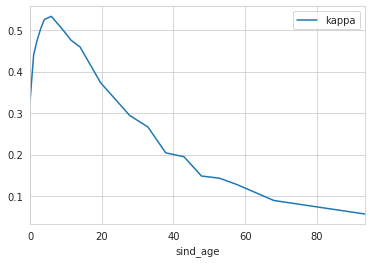

In [22]:
sel=(~data['flagC'] )
var_bin = 'sind_age'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R','x']
bins=[-1,0,1,2,3,4,7,10, 12,15,25,30,35,40,45,50,55,60,80,500 ]
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
mean_baseline[['sind_age','kappa']].plot(x='sind_age',y='kappa')
mean_baseline[['sind_age','kappa']].to_csv('sind_kappa.csv')
print(mean_baseline[['sind_age','kappa']])

## Regression of $\log V_{\kappa}$ on $age,age^2$: Pratts

In [23]:
prattsdata=pd.read_csv('prattsdatabase.csv',encoding='latin-1')    
prattsdata['TargetAge2']=prattsdata['TargetAge']**2

prattsdata['TargetStructureAlt']=prattsdata['TargetStructure'].values
sel=prattsdata['TargetStructure'].isin(['Partnership', 'Limited Partnership', 'LLP'])
prattsdata.loc[sel,'TargetStructureAlt']='Partnership'
sel=prattsdata['TargetStructure'].isin(['Consolidated', 'UK Corporation', 'PC','Non-Profit','Ltd','Limited Corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='Others'
sel=prattsdata['TargetStructure'].isin(['C corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='C Corporation'

naics_labels=['Agriculture, Forestry, Fishing and Hunting',\
        'Mining, Quarrying, and Oil and Gas Extraction',\
        'Utilities',\
        'Construction',\
        'NA1',\
        'Manufacturing',\
        'NA2',\
        'Wholesale Trade',\
        'Retail Trade',\
        'NA3',\
        'Transportation and Warehousing',\
        'NA4',\
        'Information',\
        'Finance and Insurance',\
        'Real Estate and Rental and Leasing',\
        'Professional, Scientific, and Technical Services',\
        'Management of Companies and Enterprises',\
        'Administrative and Support and Waste Management and Remediation Services'\
        'NA5',\
        'Educational Services',\
        'Health Care and Social Assistance',\
        'Arts, Entertainment, and Recreation',\
        'Accommodation and Food Service',\
        'Other Services','Public administration']

len(naics_labels)

naics_code=[11,21,22,23,24,31,35,42,44,46,48,50,51,52,53,54,55,56,61,62,71,72,81,83,92]
n=24


#naics_labels=['Ag. Mining and Utilities',\
#        'Consts and Mfg',\
#        'Trade and warehousing',\
#        'Information and FIRE',\
#        'RE',\
#        'Professional services',\
#        'Nonprof services']

#naics_code=[11,23,42,51,53,54,57,92]

prattsdata['naics_label']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_labels[:n],include_lowest=True,right=False)
prattsdata['naics_code_cat']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],include_lowest=True,right=False)
prattsdata['naics_2d']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_code[:n],include_lowest=True,right=False)

prattsdata['year'] = prattsdata['SaleDate'].str[-4:]
prattsdata['year']=prattsdata['year'].astype(int)



import statsmodels.api as sm

dummies1 = pd.get_dummies(prattsdata['naics_code_cat']).rename(columns=lambda x: 'nacis_code_cat' + str(x))
dummies2 = pd.get_dummies(prattsdata['year']).rename(columns=lambda x: 'year' + str(x))
X = pd.concat([prattsdata[['TargetAge','TargetAge2']],dummies1,dummies2],axis=1)
Y=np.log(prattsdata.TotalIntangiblesPPA)
X = sm.add_constant(X)
selection=(pd.notnull(prattsdata.TargetAge)) & (prattsdata.TotalIntangiblesPPA>0)& ~(prattsdata.TargetStructureAlt=='C Corporation')& ~(prattsdata.TargetStructureAlt=='LLC')
model11 = sm.OLS(Y[selection], X[selection]).fit()
model11.summary()

24

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     TotalIntangiblesPPA   R-squared:                       0.228
Model:                             OLS   Adj. R-squared:                  0.223
Method:                  Least Squares   F-statistic:                     45.30
Date:                 Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                         18:53:44   Log-Likelihood:                -13411.
No. Observations:                 6943   AIC:                         2.691e+04
Df Residuals:                     6897   BIC:                         2.723e+04
Df Model:                           45                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.5470      1.145     10.084      0.000       9.302      13.792
TargetAge                  0.0183      0.002      8.629      0.000       0.014       0.022
TargetAge2              -4.99e-05   1.46e-05     -3.413      0.001   -7.86e-05   -2.12e-05
nacis_code_cat[11, 21)    -0.4594      1.285     -0.357      0.721      -2.979       2.060
nacis_code_cat[21, 22)     3.1797      1.294      2.458      0.014       0.644       5.716
nacis_code_cat[22, 23)    -0.5650      1.349     -0.419      0.675      -3.209       2.079
nacis_code_cat[23, 24)    -0.1541      1.194     -0.129      0.897      -2.494       2.186
nacis_code_cat[24, 31) -6.894e-15   1.01e-14     -0.686      0.493   -2.66e-14    1.28e-14
nacis_code_cat[31, 35)     0.2924      1.192      0.245      0.806      -2.044       2.629
nacis_code_cat[35, 42) -1.458e-14    3.9e-14     -0.373      0.709   -9.11e-14    6.19e-14
nacis_code_cat[42, 44)    -1.7597      1.286     -1.369      0.171      -4.280       0.761
nacis_code_cat[44, 46)    -1.0531      1.191     -0.884      0.377      -3.388       1.281
nacis_code_cat[46, 48) -1.401e-14   1.87e-14     -0.751      0.453   -5.06e-14    2.26e-14
nacis_code_cat[48, 50)    -0.6359      1.194     -0.533      0.594      -2.977       1.705
nacis_code_cat[50, 51)  4.997e-15   7.13e-15      0.701      0.484   -8.98e-15     1.9e-14
nacis_code_cat[51, 52)     1.9595      1.198      1.636      0.102      -0.388       4.307
nacis_code_cat[52, 53)     0.4310      1.199      0.360      0.719      -1.919       2.781
nacis_code_cat[53, 54)    -0.5248      1.196     -0.439      0.661      -2.870       1.820
nacis_code_cat[54, 55)     0.3950      1.193      0.331      0.741      -1.944       2.734
nacis_code_cat[55, 56)     5.4398      1.407      3.866      0.000       2.681       8.198
nacis_code_cat[56, 61)    -0.8055      1.192     -0.676      0.499      -3.141       1.530
nacis_code_cat[61, 62)    -1.0929      1.205     -0.907      0.364      -3.455       1.269
nacis_code_cat[62, 71)    -0.5618      1.194     -0.471      0.638      -2.902       1.778
nacis_code_cat[71, 72)    -1.2780      1.201     -1.064      0.287      -3.632       1.076
nacis_code_cat[72, 81)    -1.5446      1.191     -1.297      0.195      -3.879       0.790
nacis_code_cat[81, 83)    -1.6104      1.191     -1.352      0.176      -3.946       0.725
nacis_code_cat[83, 92)  3.713e-15   1.25e-14      0.298      0.766   -2.07e-14    2.82e-14
year1990               -1.387e-14   2.27e-14     -0.612      0.540   -5.83e-14    3.05e-14
year1991               -9.191e-15   8.71e-15     -1.055      0.291   -2.63e-14    7.88e-15
year1992               -1.186e-14   8.03e-15     -1.477      0.140   -2.76e-14    3.88e-15
year1993                  -1.1647      1.142     -1.020      0.308   

## Regression of $\log V_{\kappa}$ on $age,age^2$: Model

In [24]:
sel=(~data['flagC'] )
data['sind_age2']=data['sind_age']**2
X = data[['sind_age','sind_age2']]
Y=np.log(data.R)
X = sm.add_constant(X)
model11 = sm.OLS(Y[sel], X[sel]).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          5.28e-126
Time:                        18:53:45   Log-Likelihood:                -98061.
No. Observations:               48366   AIC:                         1.961e+05
Df Residuals:                   48363   BIC:                         1.962e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4068      0.013   -109.712      0.000      -1.432      -1.382
sind_age       0.0178      0.002     10.858      0.000       0.015       0.021
sind_age2     -0.0007   3.33e-05    -19.902      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      412.631   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.030
Skew:                          -0.060   Prob(JB):                    3.85e-140
Kurtosis:                       3.552   Cond. No.                         854.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Business and Labor Income Percentiles

In [25]:
quantiles=pd.DataFrame( (data[data.flagC==True].lab_inc.quantile(np.linspace(0,1,21))))
quantiles['bus_inc']=data[data.flagC==False].bus_inc.quantile(np.linspace(0,1,21))
print(quantiles)

       lab_inc  bus_inc
0.000 0.000    -2.067  
0.050 0.000    -1.148  
0.100 0.554    -0.002  
0.150 0.947    -0.001  
0.200 1.242    -0.000  
0.250 1.252    -0.000  
0.300 1.372    -0.000  
0.350 1.477    -0.000  
0.400 1.566    -0.000  
0.450 1.643    0.000   
0.500 1.728    0.000   
0.550 1.813    0.008   
0.600 1.855    0.032   
0.650 1.980    0.247   
0.700 2.593    0.414   
0.750 3.002    1.312   
0.800 3.215    2.098   
0.850 3.377    2.414   
0.900 3.539    2.640   
0.950 3.722    2.787   
1.000 6.536    3.000   


# Lorenz curves

In [26]:
sel=(~data['flagC'] )
LzData=pd.DataFrame()
LzData['frac_pop']=np.linspace(0,1,21)
LzData['bus_inc']=Lorenz(data[sel]['bus_inc'],LzData.frac_pop)
LzData['kappa']=Lorenz(data[sel]['kappa'],LzData.frac_pop)
LzData['hkap']=Lorenz(data[sel]['hkap'],LzData.frac_pop)
LzData['hy']=Lorenz(data[sel]['hy'],LzData.frac_pop)

LzData['ns']=Lorenz(data[sel]['ns'],LzData.frac_pop)
LzData['ks']=Lorenz(data[sel]['ks'],LzData.frac_pop)
LzData['R']=Lorenz(data[sel]['R'],LzData.frac_pop)
LzData['Vb_sdf']=Lorenz(data[sel]['val_sdf'],LzData.frac_pop)
LzData['Vb_mf']=Lorenz(data[sel]['val_mf'],LzData.frac_pop)

LzData

,frac_pop,bus_inc,kappa,hkap,hy,ns,ks,R,Vb_sdf,Vb_mf
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.050,-0.141,0.000,0.000,0.000,0.000,0.000,0.001,0.018,0.023
2,0.100,-0.149,0.000,0.000,0.000,0.000,0.000,0.002,0.039,0.049
3,0.150,-0.149,0.000,0.000,0.000,0.000,0.000,0.004,0.064,0.076
4,0.200,-0.149,0.000,0.000,0.000,0.000,0.000,0.008,0.091,0.104
5,0.250,-0.149,0.000,0.000,0.000,0.000,0.000,0.012,0.118,0.133
6,0.300,-0.149,0.001,0.000,0.000,0.000,0.000,0.015,0.146,0.163
7,0.350,-0.149,0.007,0.000,0.000,0.000,0.000,0.019,0.176,0.193
8,0.400,-0.149,0.023,0.001,0.000,0.000,0.000,0.023,0.206,0.224
9,0.450,-0.149,0.058,0.001,0.000,0.000,0.000,0.027,0.238,0.259


# Cross Sectional Moments: All Businesses

In [27]:
sel=(~data['flagC'] )

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols



val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val

sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel2].R,data[sel2]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(data[sel].kappa,data[sel]['wgt'])
moments_only_business['kappa']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] )  & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val

val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val



print (moments_only_business)
moments_only_business.to_excel('moments_all_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  div yield: sdf  \
mean 1.078               1.075              0.593             0.015             
std  0.238               0.214              0.405             0.124             
gini 0.104               0.094              0.366             3.383             
p10  0.868               0.886              0.110             -0.001            
p25  1.010               1.015              0.125             -0.000            
p50  1.020               1.020              0.752             0.000             
p75  1.169               1.156              1.000             0.049             
p95  1.545               1.523              1.000             0.167             
p99  1.950               1.865              1.000             0.180             

      div yield: mf  market value: R  valuation: sdf  valuation: mf  kappa  \
mean 0.016          1.026            3.368           3.781          0.441    
std  0.110          1.388        

## Decomposition by  Sweat Capital: All Businesses

In [28]:
sel=(~data['flagC'] )

var_bin = 'kappa'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_kappa                                                                      
0         0.000  0.997      1.006    -0.000       -41.116           1.842      
1         0.051  0.879      1.010    -0.000       -35.060           1.877      
2         0.503  0.577      1.057    -0.001       7.143             2.736      
3         0.763  0.368      1.095    0.003        22.160            4.348      
4         0.888  0.205      1.224    0.075        35.030            6.035      

               a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_kappa                                                                     
0         12.664 14.506      8.505  8.160     54.830   0.889        -0.039    
1         13.283 15.160      13.461 12.460    59.350   0.895        -0.004    
2         16.487 19.223      12.723 11.263    53.058   0.862        0.179     
3         15.063 19.412      8.622  7.091   

## Decomposition by  Financial assets: All Businesses

In [29]:
sel=(~data['flagC'] )

var_bin = 'a'
num_bins=5
varlist=['kappa','R','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa     R  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_a                                                                   
0     0.365  0.720 0.667      1.099    -0.009       -10.969             
1     0.434  0.991 0.605      1.078    0.015        -0.991              
2     0.456  1.055 0.592      1.078    0.020        -0.993              
3     0.511  1.194 0.559      1.074    0.027        3.350               
4     0.440  1.031 0.602      1.062    0.024        -2.244              

       val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_a                                                                      
0     2.587    2.832  5.419       7.791  7.081     48.334   0.892          
1     3.388    7.707  11.095      8.852  7.877     48.132   0.848          
2     3.605    12.233 15.838      9.817  8.782     52.549   0.831          
3     3.853    18.237 22.090      10.203 8.933     54.202   0.811          
4     3.405    29.452 32.857    

## Decomposition by z: All Businesses

In [30]:
sel=(~data['flagC'] )  
var_bin = 'z'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)

       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_z                                                                      
0     0.240  0.999      0.960    -0.000       -96.650           2.087      
1     0.167  0.989      0.984    -0.000       -75.565           1.983      
2     0.246  0.871      0.965    0.001        -19.519           2.137      
3     0.386  0.556      0.967    0.018        37.915            2.679      
4     0.666  0.319      1.228    0.028        33.168            4.854      

           a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_z                                                                     
0     14.115 16.202      11.298 10.243    55.143   0.886        -0.840    
1     13.808 15.791      11.040 10.098    54.986   0.889        -0.420    
2     14.136 16.272      11.053 10.101    54.764   0.891        0.000     
3     13.947 16.626      11.025 9.818     53.039   0.878        0.420     
4     14.219 19.0

# Cross Sectional Moments: Young Businesses

#### ``young'' defined as owners that have been running the businesse for less than 5 yrs (variable: sind_age)

In [31]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols

val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val


val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].R,data[sel]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(w*data[sel].ns,data[sel]['wgt'])
moments_only_business['ns']=val


val,cols=stats.describe(data[sel].ks,data[sel]['wgt'])
moments_only_business['ks']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] ) & (~data['flagO']) & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val


val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val


print (moments_only_business)
moments_only_business.to_excel('moments_young_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  \
mean 1.119               1.114              0.581               
std  0.289               0.260              0.415               
gini 0.132               0.119              0.379               
p10  0.820               0.844              0.108               
p25  1.007               1.014              0.119               
p50  1.037               1.037              0.726               
p75  1.223               1.201              1.000               
p95  1.650               1.610              1.000               
p99  2.023               1.923              1.000               

      market value: R  div yield: sdf  div yield: mf  valuation: sdf  \
mean 1.026            -0.014          -0.010         3.545             
std  1.400            0.169           0.148          1.876             
gini 0.674            -5.560          -7.155         0.292             
p10  0.019            -0.379          -0.339         1.633   

## Decomposition by  Sweat Capital: Young Businesses

In [32]:
sel=(~data['flagC'] ) & (data['sind_age']<5) 
var_bin = 'kappa'
num_bins=5
varlist=['kappa','x','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa     x  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_kappa                                                                   
0         0.000  0.000 0.997      0.997    0.000        -37.977             
1         0.015  0.000 0.917      1.000    0.000        -33.449             
2         0.496  0.273 0.492      1.117    -0.037       3.829               
3         0.791  0.589 0.374      1.202    -0.068       4.151               
4         0.892  0.491 0.237      1.281    0.035        25.394              

           val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_kappa                                                                      
0         1.951    12.655 14.606      1.958  1.422     47.677   0.888          
1         2.000    12.888 14.888      2.740  1.449     47.832   0.896          
2         3.210    14.470 17.680      2.573  1.603     46.455   0.844          
3         4.646    11.463 16.109      3.269  1.848     41.15

## Decomposition by Financial Assets: Young Businesses

In [33]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

var_bin = 'a'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_a                                                                      
0     0.443  0.616      1.167    -0.037       -13.675           2.945      
1     0.457  0.577      1.112    -0.007       -1.630            3.649      
2     0.444  0.602      1.112    -0.008       -6.773            3.737      
3     0.460  0.602      1.106    -0.007       -6.246            3.876      
4     0.392  0.621      1.100    -0.010       -9.723            3.518      

           a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_a                                                                     
0     2.189  5.134       2.166  1.562     43.596   0.874        0.371     
1     6.379  10.027      2.740  1.666     41.483   0.836        0.320     
2     10.487 14.224      2.904  1.678     44.745   0.825        0.299     
3     15.868 19.744      2.654  1.695     49.287   0.810        0.311     
4     27.076 30.5

## Decomposition by z: Young Businesses

In [34]:
sel=(~data['flagC'] ) & (data['sind_age']<5)  

var_bin = 'z'
varlist=['bus_inc','kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','hy','hkap','n_e','ns','ks','R']
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       bus_inc  kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_z                                                                      
0     -0.001   0.135  0.999      0.951    -0.000       -97.056             
1     -0.000   0.066  0.990      0.980    -0.000       -74.897             
2     0.005    0.140  0.893      0.956    0.000        -6.924              
3     0.179    0.325  0.559      0.938    0.018        45.539              
4     0.995    0.727  0.351      1.306    -0.036       11.421              

       val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_z                                                                      
0     2.081    12.804 14.885      2.566  1.564     48.551   0.890          
1     2.010    12.812 14.822      2.382  1.487     46.936   0.891          
2     2.124    12.904 15.029      2.590  1.607     46.833   0.895          
3     2.686    12.495 15.181      3.080  1.859     46.032   0.883          
4     4.976

# Effects of change in $\tau_{b}$
Please point to the simulations of the economy after the tabx change

In [35]:
df_baseline=[]
df_target=[]
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()
w,p,rc,rs,delta,GDP=get_prices(path_target,momfilename_target)
df_target=uploadData(path_target,w,rs,rc,p,delta)

##    $\Delta$  in Equilibrium Prices
% change in wage, rental rate of capital, and relative price of s-good

In [36]:
varlist=['Wage (w)','S-good price (p)','Interest rate (r_c)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

Wage (w):  0.547889980341032
S-good price (p):  4.404560313032957
Interest rate (r_c):  -0.8623765613766543


##    $\Delta$  in economy-wide aggregates

In [37]:
DeltaDebt=(__extract_num__('  Govt. debt(b)',textbuffer_target)/__extract_num__('  Govt. debt(b)',textbuffer_baseline)-1)*100
DeltaFracS=(__extract_num__('  Frac of S-corp owner',textbuffer_target)/__extract_num__('  Frac of S-corp owner',textbuffer_baseline)-1)*100

DeltaGDP=(__extract_num__('  GDP',textbuffer_target)/__extract_num__('  GDP',textbuffer_baseline)-1)*100
AggCons_baseline=__extract_num__('  Consumption(Ecc)',textbuffer_baseline)+__extract_num__('  Consumption(Ecs)',textbuffer_baseline)*__extract_num__('S-good price (p)',textbuffer_baseline)
AggCons_target=__extract_num__('  Consumption(Ecc)',textbuffer_target)+__extract_num__('  Consumption(Ecs)',textbuffer_target)*__extract_num__('S-good price (p)',textbuffer_target)
DeltaAggCons=(AggCons_target/AggCons_baseline-1)*100
AggHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_baseline)+__extract_num__('  Hours, production(Ehy) ',textbuffer_baseline)
AggHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_target)+__extract_num__('  Hours, production(Ehy) ',textbuffer_target)
DeltaAggHours=(AggHours_target/AggHours_baseline-1)*100
DeltaVb_mutual=(df_target.val_mf.sum()/data.val_mf.sum()-1)*100
AggFa_baseline=__extract_num__('  Capital(kc)',textbuffer_baseline)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_baseline)
AggFa_target=__extract_num__('  Capital(kc)',textbuffer_target)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_target)
DeltaAggFa=(AggFa_target/AggFa_baseline-1)*100  
DeltaTaxRevenues=(__extract_num__('  Tax revenue(tax_rev)',textbuffer_target)/__extract_num__('  Tax revenue(tax_rev)',textbuffer_baseline)-1)*100
AggEmpHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)
AggEmpHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)
DeltaAggEmpHours=(AggEmpHours_target/AggEmpHours_baseline-1)*100


In [38]:
print("GDP: " + str( DeltaGDP))
print("Agg. Cons: " + str( DeltaAggCons))
print("Agg. Hours: " + str( DeltaAggHours))
print("Agg. Emp Hours: " + str( DeltaAggEmpHours))
print("Agg. Vb (mf): " + str( DeltaVb_mutual))
print("Agg. Fixed assets: " + str( DeltaAggFa))
print("Agg. Tax revenues: " + str( DeltaTaxRevenues))
print("Agg. Debt: " + str(DeltaDebt))
print("Frac in S: " + str(DeltaFracS))

GDP: 9.204083820649721
Agg. Cons: 11.925017992369181
Agg. Hours: 8.217647781803539
Agg. Emp Hours: 13.964127486353494
Agg. Vb (mf): 14.744869662610082
Agg. Fixed assets: 13.099063990701554
Agg. Tax revenues: -1.7968692197803948
Agg. Debt: -19.81030233182026
Frac in S: -18.12430219575735


##    $\Delta$  in C-corp sector

In [39]:
varlist=['  Output(yc) ','  Consumption(Ecc)','  Eff. Worked Hours Demand(nc)','  Capital(kc)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

  Output(yc) :  12.83515571888032
  Consumption(Ecc):  11.95181728716841
  Eff. Worked Hours Demand(nc):  12.220311874214062
  Capital(kc):  13.447796182112493


In [40]:
df_baseline_workers = data[data['flagC']==True]
df_target_workers=df_target[df_target['flagC']==True]
df_baseline = data[data['flagC']==False]
df_target=df_target[df_target['flagC']==False]

In [41]:
my_file_handle=open(path_baseline+'/'+momfilename_baseline)
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()

##    $\Delta$ factor use and outputs for  Private Busineses

In [42]:
varlist=['x','hy','ns','hkap','ne','ys','ks','kappa','bus_inc','pys','wns','val_mf','val_sdf','div','s_age','pys']
print("---------------- sum change (%)--------------")
# per_change_agg=100.*(df_target[varlist].sum()/df_baseline[varlist].sum() -1.)
# print(per_change_agg)
print(100.*(df_target.sum()/df_baseline.sum() - 1.)[varlist])

---------------- sum change (%)--------------
x         9.898  
hy        -12.654
ns        17.644 
hkap      -5.256 
ne        -11.108
ys        7.226  
ks        12.451 
kappa     1.968  
bus_inc   5.037  
pys       11.949 
wns       18.288 
val_mf    2.447  
val_sdf   2.328  
div       14.542 
s_age     -28.266
pys       11.949 
dtype: float64


##  Aggregate $\Delta$ profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [43]:
print("---------------- profitability --------------")
target_profitability=df_target.bus_inc.sum()/df_target.ks.sum()
baseline_profitability=df_baseline.bus_inc.sum()/df_baseline.ks.sum()
print("after tax change:  % 4.2f" % (100*target_profitability))
print("Baseline:          % 4.2f"  % (100*baseline_profitability))
print("DELTA:             % 4.2f" % ( 100*(target_profitability/baseline_profitability-1) ))


---------------- profitability --------------
after tax change:   7.63
Baseline:           8.17
DELTA:             -6.59


##  Aggregate $\Delta$ markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [44]:
target_markups=df_target.bus_inc.sum()/df_target.cogs.sum()
baseline_markups=df_baseline.bus_inc.sum()/df_baseline.cogs.sum()
print("after tax change:  % 4.2f" % (100*target_markups))
print("Baseline:          % 4.2f"  % (100*baseline_markups))
print("DELTA:             % 4.2f" % ( 100*(target_markups/baseline_markups-1) ))


after tax change:   37.11
Baseline:           40.54
DELTA:             -8.47


## Aggregate $\Delta$ TFP in passthru
Agg. TFP is defined as (sum of ys )  divided   (sum of ks)^(1/3) x (sum of ns)^(2/3)

In [45]:
target_TFP=(df_target.ys.sum())/ (((df_target.ks.sum())**(0.33))*((df_target.ns.sum())**(0.66)))
baseline_TFP=(df_baseline.ys.sum()) /(((df_baseline.ks.sum())**(0.33))*((df_baseline.ns.sum())**(0.66)))
print("after tax change:   % 4.2f" % (target_TFP))
print("Baseline:           % 4.2f" % (baseline_TFP))
print("DELTA:              % 4.2f"% (100*(target_TFP/baseline_TFP-1))) 


after tax change:    2.11
Baseline:            2.27
DELTA:              -7.34


## Decomposition of $\Delta$ by Owner productivity "z"

In [46]:
var_bin = 'z'
var_list=['ztilde','eps','a','bus_inc','ys','ks','kappa','ns','hy','hkap','ztilde_meas','zkapphi','ne','measured_markups','pys','wns']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY z
BINS = [-1.0, 0.43, 0.66, 1.0, 1.52, 2.32]


### Total change

In [47]:
agg= 100*total/sum_baseline.sum() 
aggsum=100*total.sum()/sum_baseline.sum()    
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",8.850,-2.944,-2.038,-0.002,0.000,0.000,-0.205,0.000,-0.000,-0.004,-4.041,-0.527,-0.001,-119.525,0.000,0.000
1,"(0.432, 0.657]",4.143,-2.767,-1.946,-0.000,-0.000,0.000,-0.282,0.000,-0.001,-0.008,-3.748,-0.719,-0.003,-80.404,0.000,0.000
2,"(0.657, 1.0]",0.000,-2.965,-2.011,0.004,0.004,0.010,-0.094,0.012,-0.030,0.001,-4.131,-1.210,-0.023,-9.710,0.009,0.013
3,"(1.0, 1.522]",-5.294,-3.658,-2.084,0.211,0.154,0.374,0.435,0.518,-1.103,0.011,-5.409,-2.541,-0.870,73.494,0.353,0.540
4,"(1.522, 2.317]",-17.662,-6.904,-2.159,4.824,7.068,12.067,2.115,17.113,-11.520,-5.256,-8.964,-8.063,-10.211,139.542,11.587,17.735
5,total,-9.963,-19.239,-10.237,5.037,7.226,12.451,1.968,17.644,-12.654,-5.256,-26.293,-13.061,-11.108,3.397,11.949,18.288


### Intensive 

In [48]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",-0.000,-0.125,1.061,-0.009,0.000,0.000,1.612,0.000,0.000,0.033,-1.017,0.079,0.007,1.233,0.000,0.000
1,"(0.432, 0.657]",-0.000,-0.151,0.884,-0.003,0.001,0.001,0.882,0.001,0.001,0.016,-0.909,0.051,0.004,9.098,0.001,0.001
2,"(0.657, 1.0]",0.000,-0.146,1.098,0.046,0.035,0.042,1.782,0.038,0.044,0.038,-1.053,0.234,0.043,16.803,0.042,0.039
3,"(1.0, 1.522]",0.000,-0.204,1.571,1.492,1.028,1.272,3.909,1.266,0.577,0.078,-1.725,0.620,0.473,18.712,1.248,1.290
4,"(1.522, 2.317]",-0.000,-0.783,4.103,19.339,22.074,27.478,11.920,33.066,1.224,9.317,-3.544,1.918,2.915,61.568,26.959,33.738
5,total,-0.000,-1.409,8.717,20.866,23.138,28.794,20.105,34.371,1.846,9.484,-8.249,2.901,3.442,107.414,28.250,35.069


### Extensive

In [49]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",8.850,-2.819,-3.099,0.006,-0.000,-0.000,-1.817,-0.000,-0.000,-0.037,-3.024,-0.606,-0.008,-120.758,-0.000,-0.000
1,"(0.432, 0.657]",4.143,-2.616,-2.831,0.003,-0.001,-0.001,-1.164,-0.001,-0.002,-0.025,-2.839,-0.770,-0.007,-89.502,-0.001,-0.001
2,"(0.657, 1.0]",-0.000,-2.819,-3.109,-0.042,-0.032,-0.033,-1.877,-0.026,-0.073,-0.038,-3.078,-1.444,-0.066,-26.513,-0.033,-0.026
3,"(1.0, 1.522]",-5.294,-3.455,-3.654,-1.281,-0.874,-0.898,-3.474,-0.748,-1.680,-0.067,-3.683,-3.161,-1.343,54.782,-0.895,-0.750
4,"(1.522, 2.317]",-17.662,-6.121,-6.262,-14.515,-15.005,-15.411,-9.805,-15.953,-12.744,-14.573,-5.420,-9.981,-13.126,77.974,-15.372,-16.003
5,total,-9.963,-17.830,-18.955,-15.829,-15.912,-16.343,-18.137,-16.727,-14.500,-14.740,-18.044,-15.962,-14.550,-104.018,-16.302,-16.780


##  Decomposition of $\Delta$ by Owner sweat capital

In [50]:
var_bin = 'kappa'
num_bins=5
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)



SORTED BY kappa
BINS = [-inf, 0.0, 0.23, 0.68, 0.83, inf]


### Total change

In [51]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.00046]",1.816,-4.289,-3.624,-0.000,-0.000,-0.000,-0.001,-0.000,-0.000,-0.000,-5.611,-0.598,-0.000,-62.443,-0.000,-0.000
1,"(0.00046, 0.226]",0.176,-6.145,-4.805,-0.027,-0.036,-0.033,-0.788,-0.024,-0.098,-0.201,-7.740,-3.366,-0.120,-78.147,-0.033,-0.023
2,"(0.226, 0.68]",-8.890,-10.891,-11.755,-4.783,-5.430,-5.341,-12.235,-5.041,-7.064,-9.372,-11.359,-11.406,-7.546,77.924,-5.350,-5.032
3,"(0.68, 0.828]",-26.279,-12.438,-10.897,-22.721,-23.333,-23.022,-19.537,-22.841,-24.112,-27.651,-10.952,-18.390,-24.852,129.656,-23.052,-22.804
4,"(0.828, inf]",23.213,14.524,20.844,32.567,36.025,40.846,34.528,45.550,18.621,31.968,9.369,20.698,21.410,-63.594,40.383,46.148
5,total,-9.963,-19.239,-10.237,5.037,7.226,12.451,1.968,17.644,-12.654,-5.256,-26.293,-13.061,-11.108,3.397,11.949,18.288


### Intensive 

In [52]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.00046]",1.395,-0.199,0.163,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-1.389,-0.008,-0.000,11.682,-0.000,-0.000
1,"(0.00046, 0.226]",0.113,-0.280,0.937,0.011,-0.003,0.001,-0.128,0.003,-0.018,-0.092,-1.484,-0.110,-0.034,11.423,0.001,0.003
2,"(0.226, 0.68]",-3.575,-0.628,0.356,-2.237,-2.619,-2.484,-0.842,-2.383,-3.188,-3.658,-1.049,-1.107,-3.286,71.746,-2.497,-2.369
3,"(0.68, 0.828]",-10.197,-0.593,1.941,-11.935,-10.796,-10.282,0.014,-10.218,-10.883,-7.215,-0.525,-3.244,-10.117,39.612,-10.332,-10.158
4,"(0.828, inf]",-11.017,1.572,6.704,-9.642,-5.221,-1.372,5.807,1.985,-16.999,1.350,-1.613,-3.023,-13.165,108.904,-1.742,2.463
5,total,-23.281,-0.128,10.101,-23.803,-18.639,-14.138,4.851,-10.614,-31.088,-9.616,-6.060,-7.492,-26.601,243.367,-14.570,-10.061


### Extensive

In [53]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.00046]",0.421,-4.090,-3.787,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-4.222,-0.590,-0.000,-74.125,-0.000,-0.000
1,"(0.00046, 0.226]",0.064,-5.866,-5.742,-0.037,-0.033,-0.034,-0.660,-0.026,-0.080,-0.109,-6.256,-3.256,-0.086,-89.570,-0.034,-0.027
2,"(0.226, 0.68]",-5.315,-10.263,-12.111,-2.546,-2.811,-2.857,-11.393,-2.658,-3.877,-5.714,-10.310,-10.298,-4.260,6.178,-2.853,-2.663
3,"(0.68, 0.828]",-16.082,-11.845,-12.838,-10.786,-12.537,-12.739,-19.551,-12.623,-13.229,-20.436,-10.427,-15.146,-14.735,90.044,-12.720,-12.646
4,"(0.828, inf]",34.230,12.952,14.140,42.209,41.246,42.219,28.720,43.564,35.620,30.618,10.982,23.721,34.575,-172.498,42.125,43.685
5,total,13.318,-19.111,-20.339,28.840,25.865,26.588,-2.884,28.258,18.433,4.360,-20.233,-5.569,15.493,-239.970,26.519,28.350


##   Decomposition of $\Delta$ by Owner Financial assets

In [54]:
var_bin = 'a'
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY a
BINS = [-inf, 5.41, 9.94, 14.77, 22.52, inf]


### Total change

In [55]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()   
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.412]",-3.382,-4.919,-1.417,-1.004,-1.090,-0.442,-1.989,0.134,-3.616,-4.922,-6.124,-4.069,-3.889,-12.042,-0.504,0.211
1,"(5.412, 9.936]",-4.781,-7.597,-3.944,-4.927,-4.352,-3.545,-4.272,-2.738,-7.515,-5.705,-8.613,-6.395,-7.137,12.037,-3.623,-2.640
2,"(9.936, 14.775]",-3.218,-4.453,-3.485,-0.792,0.124,1.191,-0.742,2.204,-3.771,0.210,-5.807,-3.253,-2.939,5.477,1.088,2.336
3,"(14.775, 22.517]",-0.576,-1.434,-1.788,3.226,3.964,5.318,2.281,6.632,-0.932,2.215,-3.231,-0.850,-0.275,24.947,5.188,6.801
4,"(22.517, inf]",1.993,-0.836,0.395,8.533,8.581,9.929,6.688,11.412,3.180,2.947,-2.519,1.506,3.132,-27.023,9.800,11.581
5,total,-9.963,-19.239,-10.237,5.037,7.226,12.451,1.968,17.644,-12.654,-5.256,-26.293,-13.061,-11.108,3.397,11.949,18.288


### Intensive 

In [56]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.412]",0.959,-0.787,-0.600,1.911,2.400,3.139,1.920,3.690,0.059,1.581,-1.292,-0.104,0.377,9.710,3.068,3.778
1,"(5.412, 9.936]",3.028,-0.474,0.046,3.530,4.188,5.226,3.706,6.187,0.420,2.647,-1.507,1.057,0.886,19.390,5.126,6.314
2,"(9.936, 14.775]",1.258,-0.231,0.188,4.415,5.330,6.539,4.090,7.685,0.901,4.799,-1.637,1.189,1.715,8.204,6.423,7.834
3,"(14.775, 22.517]",1.027,0.058,0.128,5.259,5.951,7.359,4.150,8.743,0.776,3.649,-1.767,0.771,1.376,23.771,7.223,8.918
4,"(22.517, inf]",2.759,-0.083,1.957,9.429,9.453,10.827,7.557,12.352,3.890,3.507,-1.916,2.286,3.810,-26.831,10.695,12.524
5,total,9.031,-1.517,1.719,24.544,27.321,33.090,21.422,38.657,6.046,16.183,-8.119,5.199,8.164,34.244,32.536,39.368


### Extensive

In [57]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.412]",-4.341,-4.132,-0.817,-2.915,-3.489,-3.582,-3.909,-3.556,-3.675,-6.503,-4.832,-3.965,-4.266,-21.752,-3.573,-3.567
1,"(5.412, 9.936]",-7.809,-7.123,-3.989,-8.456,-8.540,-8.771,-7.977,-8.926,-7.936,-8.353,-7.106,-7.453,-8.023,-7.353,-8.749,-8.954
2,"(9.936, 14.775]",-4.476,-4.222,-3.673,-5.207,-5.206,-5.348,-4.832,-5.481,-4.672,-4.589,-4.170,-4.442,-4.654,-2.727,-5.335,-5.499
3,"(14.775, 22.517]",-1.603,-1.491,-1.915,-2.033,-1.987,-2.041,-1.868,-2.111,-1.708,-1.434,-1.464,-1.621,-1.651,1.176,-2.035,-2.117
4,"(22.517, inf]",-0.766,-0.753,-1.562,-0.896,-0.873,-0.898,-0.868,-0.940,-0.709,-0.560,-0.602,-0.780,-0.678,-0.192,-0.896,-0.943
5,total,-18.995,-17.722,-11.956,-19.507,-20.095,-20.640,-19.454,-21.013,-18.700,-21.439,-18.174,-18.260,-19.272,-30.848,-20.587,-21.080


## Short-run Elasticities

## Concept
Our goal is to approximate short-run elaticities by comparing  similar agents across different levels of taxes. For this we use the optimal policies in the two economies and simulate paths for a buch of agents fixing their initial conditions and the sequence of exogenous shocks. 

### Implementation
Let $\Theta$ be the vector of parameters including tax rates and market clearing prices. Let $s^1=(a,\kappa)$ be the vector of endogenous  state variables for an individual,;  $s^2=(\epsilon,z,age)$ be the vector of shocks. Functions $\mathcal{F}^x(s; \Theta)$ be the optimal policies for choice variable $x$ and $\mathcal{S}^1(s;\Theta)$ the law of motion for the endogenous states under the optimal policies. We denote the ergodic distribution associated with optimal policies using $\mu(s,\Theta)$. We use $\Theta^*$ for the benchmark calibrated to US policies and $\Theta^{\prime}$ to denote the counterfactual economy with alternative taxes.


* We draw agents from the ergodic distribution, that is, a collection of $\{s_{i,0}\}_i$ from $\mu(s,\Theta)$. 
* We draw a sequence of exogenous shocks $\{s^{2}_{i,t}\}_i,t$
* We use $\mathcal{F}^x(s; \Theta^{\prime})$ and $\mathcal{S}^1(s;\Theta^{\prime})$ to generate a panel for $x^{\prime}_{i,t}$ 
$$ x^{\prime}_{i,1}= \mathcal{F}^x(s_{i,0}; \Theta^{\prime}) $$
$$ x_{i,2}= \mathcal{F}^x(\mathcal{S}^1(s^{\prime}_{i,1};\Theta^{\prime}),s_{2,i}; \Theta^{\prime})$$
and so on
*  We use $\mathcal{F}^x(s; \Theta^{*})$ and $\mathcal{S}^1(s;\Theta^{*})$ to generate a panel for $x^{*}_{i,t}$ 
* For a group $G$, we compute $\Delta^{x}_{G,t}\left(\Theta^*,\Theta^{\prime}\right)= \frac{\sum_{i\in G} x^{\prime}_{i,t} - \sum_{i\in G} x^{*}_{i,t}}{ \sum_{i\in G} x^{*}_{i,t}} $

## Application
We now compute $\Delta^{G,x}_{i,t}$ for $x=\{h_y+h_{\kappa},n_s+h_y+h_{\kappa}\} and for $G=\{all, by $z$\}$ 

In [58]:
T0=0
TN=10
e1 = import_econ(pathtosiminitbase)
e2 = import_econ(pathtosiminittarget)

base_tot_hrs=e1.data_hy+e1.data_ns+e1.data_hkap
tax_tot_hrs=e2.data_hy+e2.data_ns+e2.data_hkap
base_e_hrs=e1.data_hy+e1.data_hkap
tax_e_hrs=e2.data_hy+e2.data_hkap


data_baseline=[]
data_target=[]
data=[]
for t in range (T0,TN):
    data=np.vstack( (e1.data_hy[:,t],
                     e1.data_hkap[:,t],
                     e1.data_is_c[:,t],
                     e1.is_to_iz[e1.data_i_s[:,t]],
                     base_tot_hrs[:,t], 
                     e1.data_ns[:,t],
                     e1.data_a[:,t],
                     e1.data_kap[:,t],
                     base_e_hrs[:,t],
                     e1.data_n[:,1]

                    )  
                  )
    coldata=['hy','hkap','flagC','z','totalhrs','ns','a','kappa','ent_hrs','emp_hrs']
    data=data.T
    data_baseline.append( pd.DataFrame( data ,columns=coldata))
    data_baseline[t].flagC=data_baseline[t].flagC.astype('bool')    
    data_baseline[t]['flagS']=~data_baseline[t].flagC.astype('bool')

    data=np.vstack( (e2.data_hy[:,t],
                     e2.data_hkap[:,t],
                     e2.data_is_c[:,t],
                     e2.is_to_iz[e2.data_i_s[:,t]], 
                     tax_tot_hrs[:,t],
                     e2.data_ns[:,t],
                     e2.data_a[:,t],
                     e2.data_kap[:,t],
                     tax_e_hrs[:,t],    
                     e2.data_n[:,t]
                    )  
                  )
    data=data.T
    data_target.append( pd.DataFrame( data ,columns=coldata))
    data_target[t].flagC=data_target[t].flagC.astype('bool')
    data_target[t]['flagS']=~data_target[t].flagC.astype('bool')
   

### Total hours in business: $n_s+h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 0.076     
2 0.090     
3 0.082     
4 0.075     
5 0.070     
6 0.061     
7 0.058     
8 0.053     
9 0.048     


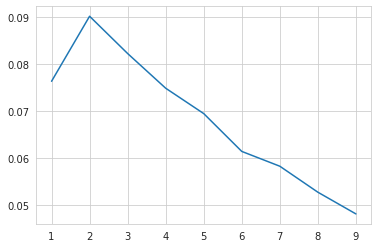

In [59]:
data_e1=[data_baseline[t].totalhrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].totalhrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.244 -0.204 -0.158 -0.127 -0.092 -0.088 -0.068 -0.045 -0.054
1.000 nan -0.223 -0.223 -0.223 -0.206 -0.157 -0.141 -0.157 -0.110 -0.079
2.000 nan -0.221 -0.190 -0.183 -0.156 -0.124 -0.139 -0.111 -0.115 -0.100
3.000 nan -0.038 -0.033 -0.044 -0.044 -0.048 -0.033 -0.036 -0.039 -0.036
4.000 nan 0.083  0.098  0.090  0.082  0.076  0.067  0.064  0.058  0.053 


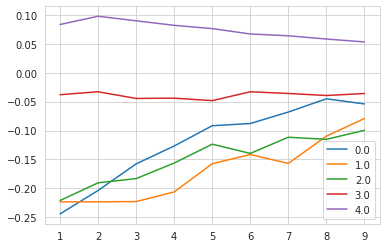

In [60]:

Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].totalhrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].totalhrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

### Total hours by entreprenurs : $h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 -0.024    
2 -0.045    
3 -0.062    
4 -0.072    
5 -0.082    
6 -0.089    
7 -0.094    
8 -0.098    
9 -0.100    


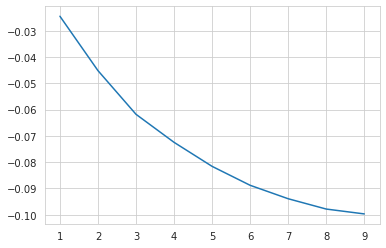

In [61]:
data_e1=[data_baseline[t].ent_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].ent_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.245 -0.204 -0.158 -0.127 -0.092 -0.089 -0.069 -0.046 -0.055
1.000 nan -0.233 -0.231 -0.230 -0.213 -0.165 -0.149 -0.163 -0.119 -0.091
2.000 nan -0.268 -0.234 -0.231 -0.203 -0.172 -0.189 -0.161 -0.167 -0.156
3.000 nan -0.105 -0.105 -0.120 -0.122 -0.130 -0.118 -0.121 -0.126 -0.123
4.000 nan -0.017 -0.040 -0.057 -0.068 -0.078 -0.086 -0.092 -0.095 -0.098


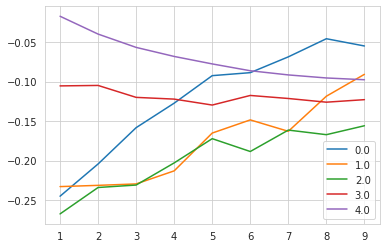

In [62]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].ent_hrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].ent_hrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Intensive Margin entreprenur hours: $h_y$+$h_{\kappa}$
In here we condition on individual who were running business in date $t=0$. We then compute the % change in hours "person-by-person" and report the 25, 50, 75 percentiles. Note that this not what GR do. But is closer to what Chettty does and calls as intensive margin. 

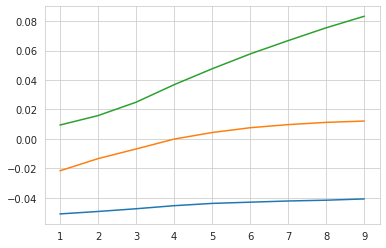

In [63]:
Delta_ent_hrs=[(data_target[t].ent_hrs-data_baseline[t].ent_hrs)/data_baseline[t].ent_hrs for t in range(T0,TN)]
sel=data_baseline[1].flagS
plt.plot([Delta_ent_hrs[t][data_baseline[1][sel].index].quantile([.25,.5,.75]) for t in range(T0,TN)])

### Num of entreprenurs 

   Delta_all
0 nan       
1 -0.100    
2 -0.110    
3 -0.119    
4 -0.125    
5 -0.128    
6 -0.131    
7 -0.134    
8 -0.138    
9 -0.136    


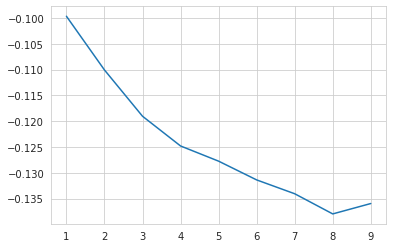

In [64]:
data_e1=[data_baseline[t].flagS.sum() for t in range(T0,TN)]
data_e2=[data_target[t].flagS.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.178 -0.175 -0.167 -0.169 -0.168 -0.166 -0.164 -0.167 -0.169
1.000 nan -0.169 -0.168 -0.173 -0.175 -0.170 -0.176 -0.175 -0.173 -0.168
2.000 nan -0.163 -0.166 -0.168 -0.168 -0.163 -0.172 -0.171 -0.176 -0.165
3.000 nan -0.088 -0.101 -0.118 -0.124 -0.130 -0.128 -0.132 -0.140 -0.137
4.000 nan -0.042 -0.061 -0.075 -0.084 -0.092 -0.098 -0.103 -0.107 -0.107


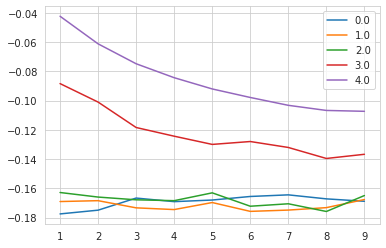

In [65]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].flagS.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].flagS.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    temp[0]=np.nan
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Employee Hours: n

   Delta_all
0 nan       
1 0.138     
2 0.148     
3 0.154     
4 0.158     
5 0.162     
6 0.163     
7 0.165     
8 0.165     
9 0.166     


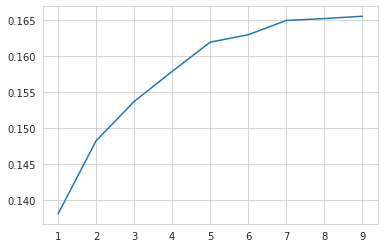

In [66]:
data_e1=[data_baseline[t].emp_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].emp_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

## Employee Hours: n intensive (median)

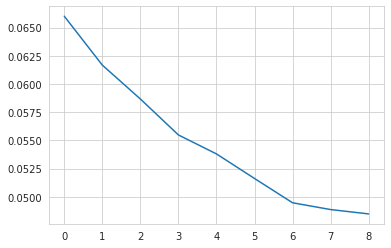

In [80]:
Delta_emp_hrs=[]
for t in range(T0,TN):
    Delta_emp_hrs.append((data_target[t].emp_hrs-data_baseline[t].emp_hrs)/data_baseline[t].emp_hrs)
    
sel=data_baseline[1].flagC
plt.plot([Delta_emp_hrs[t][data_baseline[1][sel].index].quantile(.5) for t in range(T0+1,TN)])